New York Housing data analysis

In [1]:

# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as pe
import plotly.io as pio
import plotly.graph_objects as go
import seaborn as sns




In [2]:
# data file
source=pd.read_csv('NY-House-Dataset.csv')
print(source.columns)
size_of_data=source.shape[0]
print('size of data = ', size_of_data)
source.describe()

Index(['BROKERTITLE', 'TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT',
       'ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2',
       'LOCALITY', 'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME',
       'FORMATTED_ADDRESS', 'LATITUDE', 'LONGITUDE'],
      dtype='object')
size of data =  4801


,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


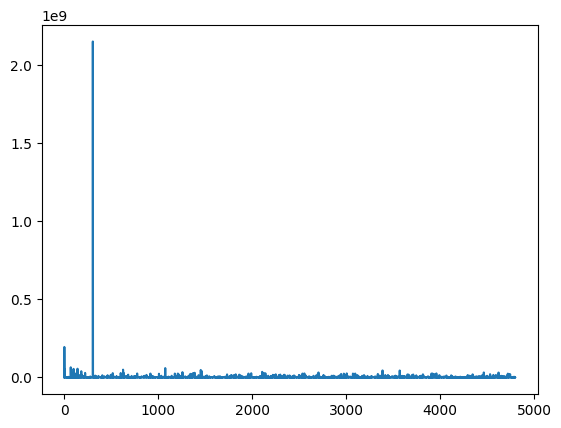

In [3]:
sub_group=source[['PRICE' , 'LOCALITY']]
plt.plot(sub_group.values[:,0])
plt.show()

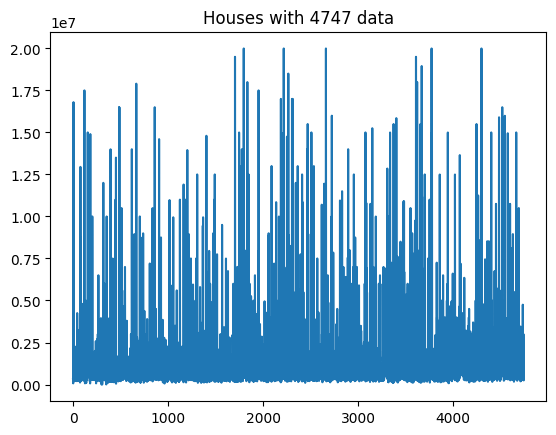

In [4]:
#Filtering
filtered_sub_group=sub_group[sub_group['PRICE']<20000000]
plt.title(f"Houses with {filtered_sub_group.values.shape[0]} data")
plt.plot(filtered_sub_group.values[:,0])
plt.show()




After analyse data decided to remove some exceptional data

Number of excluded cases = 54


(array([183., 771., 674., 749., 585., 278., 303., 155., 125., 130.,  61.,
         81.,  69.,  55.,  52.,  25.,  27.,  24.,  15.,  38.,  15.,  13.,
          8.,  16.,  32.,   4.,   8.,  11.,   5.,  22.,   1.,   5.,   7.,
          6.,  20.,   2.,   3.,  11.,   6.,  11.,   1.,   2.,   7.,   4.,
          8.,   3.,   0.,   2.,   1.,   6.,   4.,   1.,   4.,   5.,   8.,
          6.,   1.,   2.,   0.,   2.,   3.,   0.,   9.,   0.,   5.,   2.,
          0.,   1.,   2.,   3.,   3.,   0.,   0.,   2.,   7.,   6.,   1.,
          4.,   0.,   4.,   0.,   0.,   4.,   0.,   4.,   0.,   0.,   2.,
          0.,   2.,   1.,   0.,   1.,   0.,   1.,   0.,   0.,   2.,   0.,
          5.]),
 array([2.49400000e+03, 2.02419060e+05, 4.02344120e+05, 6.02269180e+05,
        8.02194240e+05, 1.00211930e+06, 1.20204436e+06, 1.40196942e+06,
        1.60189448e+06, 1.80181954e+06, 2.00174460e+06, 2.20166966e+06,
        2.40159472e+06, 2.60151978e+06, 2.80144484e+06, 3.00136990e+06,
        3.20129496e+06, 3.4012

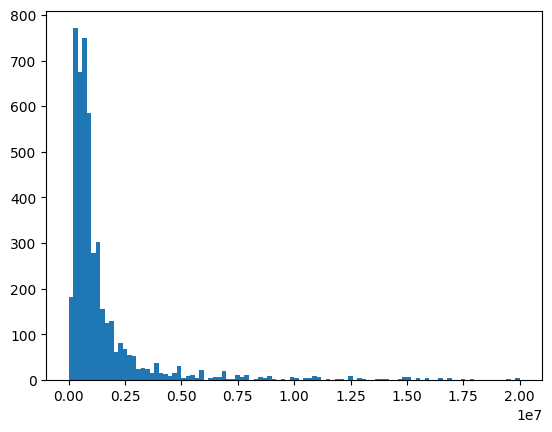

In [5]:
excluded_cases=sub_group.values.shape[0]-filtered_sub_group.values.shape[0]
print('Number of excluded cases =', excluded_cases)
filtered_sub_group.describe()
plt.hist(filtered_sub_group['PRICE'].values,bins=100)


['New York' 'New York County' 'The Bronx' 'Kings County' 'Bronx County'
 'Queens County' 'Richmond County' 'United States' 'Brooklyn' 'Queens'
 'Flatbush']


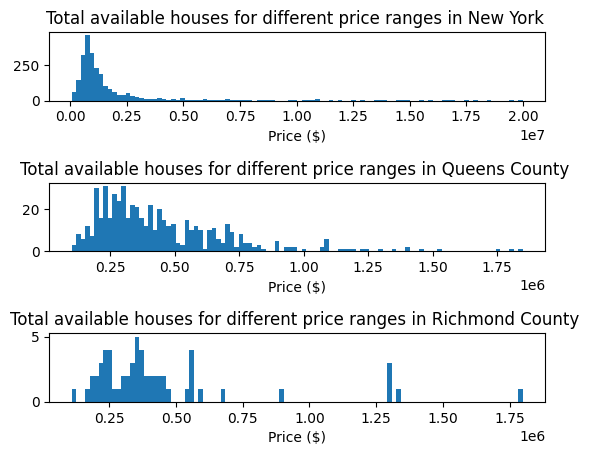

In [6]:
ax_nro=-1
all_locations= filtered_sub_group['LOCALITY'].unique()
print(all_locations)
filtered_sub_group.columns
interting_location=['New York', 'Queens County', 'Richmond County']
fig_comparison, ax_comparison= plt.subplots(3,1)
fig_comparison.subplots_adjust(hspace=1.2)
for location in interting_location:
    select_location=filtered_sub_group[filtered_sub_group['LOCALITY'] ==location]
    #print(10*'***')
    #print(location)
    #print(select_location.describe())
    ax_nro+=1
    ax_comparison[ax_nro].hist(select_location['PRICE'].values,bins=100)
    ax_comparison[ax_nro].set_title(f"Total available houses for different price ranges in {location} ")
    ax_comparison[ax_nro].set_xlabel("Price ($)")
plt.show()

In [7]:
scatter_plot_multicolor_log = pe.scatter(source, x='PROPERTYSQFT', y='PRICE', color='TYPE',
                                          title='Price vs. Property Square Footage (Logarithmic Scale)',
                                          labels={'PROPERTYSQFT': 'Property Square Footage', 'PRICE': 'Price', 'TYPE': 'House Type'},
                                          log_x=True, log_y=True)
fig = go.Figure(scatter_plot_multicolor_log)

# Display the plot
pio.show(fig)

In [8]:
#print(min(source['BEDS'].values))
scatter_plot_multicolor_log2= pe.scatter(source, x='PROPERTYSQFT', y='PRICE', color='BEDS',
                                          title='Price vs. Property Square Footage (Logarithmic Scale)',
                                          labels={'PROPERTYSQFT': 'Property Square Footage', 'PRICE': 'Price', 'BEDS': 'Beds'},
                                          log_x=True, log_y=True)
fig3 = go.Figure(scatter_plot_multicolor_log2)
#plt.hist([source,source ], bins=100, alpha=0.5, label=['BEDS', 'BATH'], color=colors)
#plt.legend(loc='upper right')
pio.show(fig3)

lets calculate the average values:

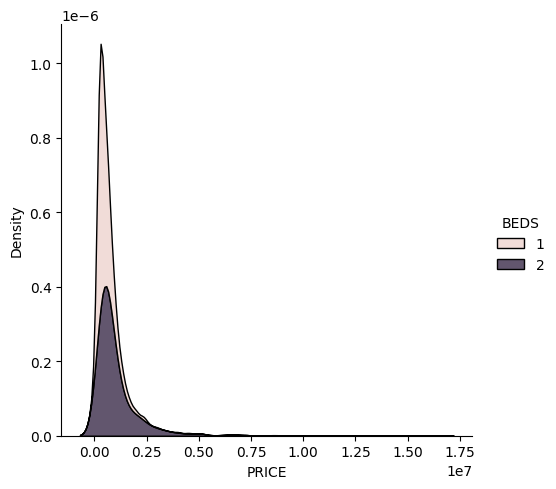

In [9]:

# lets consider the houses with one bed:
bed_1=source[source['BEDS']<3]
custom_palette = sns.color_palette("Set2", n_colors=len(bed_1['BEDS'].unique()))

sns.displot(data=bed_1,x='PRICE', kind='kde', hue='BEDS' , multiple='stack',color=custom_palette)
